$H(f,f_n,\zeta)=\frac{1}{(2\pi)^2(f^2-f_n^2+j2\zeta f f_n)}$

$|H(f,f_n,\zeta)|=\frac{1}{(2\pi)^2\sqrt{((f^2-f_n^2)^2+(2\zeta f f_n)^2)}}$

$z(f,f_n,\zeta)=|H(f,f_n,\zeta)| \ddot{y}(f,f_n,\zeta)$

$W_{z}(f,f_n,\zeta)=|H(f,f_n,\zeta)|^2W_{\ddot{y}}(f)$

$S_a=K\cdot |z|$

$W_{S_a}(f,f_n,\zeta)=K^2 \cdot W_{z}(f,f_n,\zeta)$

$M_n=\int_0^{\infty} f^nW(f)df$

## 1. BLWN

$W_{\ddot{y}}(f)=\begin{cases}
1 && f_1 \leq f \leq f_2 \\
0 && otherwise
\end{cases}$

$W_{z}(f)=\begin{cases}
\frac{1}{(2\pi)^4((f^2-f_n^2)^2+(2\zeta f f_n)^2)} && f_1 \leq f \leq f_2 \\
0 && otherwise
\end{cases}$

$W_{S_a}(f,f_n,\zeta)=K^2\frac{1}{(2\pi)^4((f^2-f_n^2)^2+(2\zeta f f_n)^2)}$

### 1.1 Moments

$M_0=\left(\frac{K}{2\pi}\right)^2\int_{f_1}^{f_2}\frac{1}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}df$

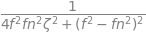

In [153]:
from sympy import *

init_printing()
f, fn, z, f1, f2= symbols('f fn zeta f1 f2')
Wsa = 1/((f**2-fn**2)**2+(2*z*f*fn)**2)

Wsa

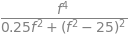

In [212]:
Wsa.subs([(fn,5),(z,0.05)])

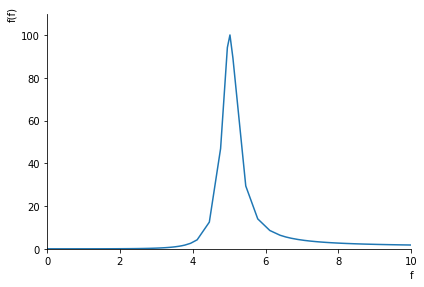

In [213]:
fn,z= 5, 0.05
Wsa = f**4/((f**2-fn**2)**2+(2*z*f*fn)**2)
%matplotlib inline  
plot(Wsa,xlim=(0,2*fn),ylim=(0,1.1*Wsa.subs(f,fn)))

In [202]:
Wsa.subs(f,fn)

In [36]:
x= symbols('x')
integrate(1/((x**2-100)**2+0.16*x**2),(x,0,1))

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [1280.0*_u**9 + 0.0599759903961593*_u**7 + 3.8953087487497e-7*_u**5 - 6.10351464765563e-15*_u**3, 0.0] by [4096.0*_u**16 + 0.639743897559032*_u**14 + 3.74749960008023e-5*_u**12 + 9.75585937593839e-10*_u**10 + 9.513850399167e-15*_u**8 - 2.98142480850039e-22*_u**6 + 2.33203545318071e-30*_u**4 + 2.05120878651554e-44*_u**2 - 2.0273362703319e-49]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR[_u]. Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.